# STOR 120: Midterm 1

**Due:** Friday, September 17, 10:10 am on Gradescope
  
**Directions:** The exam is open book, notes, course materials, internet, and all things that are not direct communication with others. Just as with all course assignments, you will submit exams to Gradescope as Jupyter Notebooks with the ipynb file extension. To receive full credit, you should show all of your code used to answer each question.

**Data:** The dataset used on this exam contains information on the number of students that majored in different topics of study at universities in the United States in 2019 and is broken down by age group, sex, and state. The original source of the data is the US Census Bureau, but this dataset was found on [Kaggle.com](https://www.kaggle.com/tjkyner/bachelor-degree-majors-by-age-sex-and-state)

**Run the cell below to import the dataset.**

In [7]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore', FutureWarning)

edu = Table.read_table('Bachelor_Degree_Majors.csv')
edu.take(0,1,2,3,4,5,6)

State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
Alabama,Total,25 and older,"885,357","263,555","98,445","210,147","141,071","172,139"
Alabama,Total,25 to 39,"268,924","90,736","32,378","58,515","29,342","57,953"
Alabama,Total,40 to 64,"418,480","115,762","46,724","112,271","63,875","79,848"
Alabama,Total,65 and older,"197,953","57,057","19,343","39,361","47,854","34,338"
Alabama,Male,25 and older,"405,618","159,366","26,004","113,909","29,490","76,849"
Alabama,Male,25 to 39,"117,794","50,188","7,712","29,859","6,357","23,678"
Alabama,Male,40 to 64,"184,328","67,977","12,331","54,931","12,820","36,269"


## Question 1 (5 Points)

The first thing we need to do is clean the data. I want you to start by creating a new table named **edu_clean** with the following changes:
- Rename the variables
    - "Bachelor's Degree Holders" should become "Total"
    - "Science and Engineering" should become "ScEn"
    - "Science and Engineering Related Fields should become "ScEn Rel"
    - "Arts, Humanities, and Others" should become "Other"
- Remove all observations where *Sex* is equal to *Total*

In [115]:
edu_clean = edu.relabeled(
    ['Bachelor\'s Degree Holders', 'Science and Engineering', 'Science and Engineering Related Fields', 'Arts, Humanities and Others'],
    ['Total', 'ScEn', 'ScEn Rel', 'Other']
).where('Sex', are.not_equal_to('Total'))

edu_clean #Do Not Change this Line

State,Sex,Age Group,Total,ScEn,ScEn Rel,Business,Education,Other
Alabama,Male,25 and older,"405,618","159,366","26,004","113,909","29,490","76,849"
Alabama,Male,25 to 39,"117,794","50,188","7,712","29,859","6,357","23,678"
Alabama,Male,40 to 64,"184,328","67,977","12,331","54,931","12,820","36,269"
Alabama,Male,65 and older,"103,496","41,201","5,961","29,119","10,313","16,902"
Alabama,Female,25 and older,"479,739","104,189","72,441","96,238","111,581","95,290"
Alabama,Female,25 to 39,"151,130","40,548","24,666","28,656","22,985","34,275"
Alabama,Female,40 to 64,"234,152","47,785","34,393","57,340","51,055","43,579"
Alabama,Female,65 and older,"94,457","15,856","13,382","10,242","37,541","17,436"
Alaska,Male,25 and older,"65,820","30,952","3,713","11,869","4,418","14,868"
Alaska,Male,25 to 39,"19,873","8,235","1,205","4,133",638,"5,662"


## Question 2 (10 Points)

Currently, there is a problem. We have several variables in our dataset that are numeric, but the presence of commas will prevent us from answering key questions about the data. Notice the following python code which can convert the string "1,030,452" to an integer.

In [53]:
int(str.replace("1,030,452",",",""))

1030452

In the next two code blocks, I want you to first create a function named **str_to_int** and then use the method **apply** to overwrite the last 6 variables of the data in **edu_clean**. Create a new table named **edu_clean_int** that is similar to the table above except the last six variables are *int* arrays and not *str* arrays. You will not get full credit if you do not create a function or do not use the **apply** method.

In [54]:
# Put your function here
def str_to_int(string):
    return int(string.replace(',' ,''))

In [116]:
# Apply your function here
edu_clean_int = edu_clean.with_columns(
    'Total', edu_clean.apply(str_to_int, 'Total'),
    'ScEn', edu_clean.apply(str_to_int, 'ScEn'),
    'ScEn Rel', edu_clean.apply(str_to_int, 'ScEn Rel'),
    'Business', edu_clean.apply(str_to_int, 'Business'),
    'Education', edu_clean.apply(str_to_int, 'Education'),
    'Other', edu_clean.apply(str_to_int, 'Other')
)

edu_clean_int #Do Not Change this Line

State,Sex,Age Group,Total,ScEn,ScEn Rel,Business,Education,Other
Alabama,Male,25 and older,405618,159366,26004,113909,29490,76849
Alabama,Male,25 to 39,117794,50188,7712,29859,6357,23678
Alabama,Male,40 to 64,184328,67977,12331,54931,12820,36269
Alabama,Male,65 and older,103496,41201,5961,29119,10313,16902
Alabama,Female,25 and older,479739,104189,72441,96238,111581,95290
Alabama,Female,25 to 39,151130,40548,24666,28656,22985,34275
Alabama,Female,40 to 64,234152,47785,34393,57340,51055,43579
Alabama,Female,65 and older,94457,15856,13382,10242,37541,17436
Alaska,Male,25 and older,65820,30952,3713,11869,4418,14868
Alaska,Male,25 to 39,19873,8235,1205,4133,638,5662


In [20]:
# If you cannot figure out how to do this, run this code.
# This code will load the cleaned version of the file.
# You will need this to work if you want to complete the exam.
# The rest of the exam depends on getting this part correct.
# Only do this if you cannot figure this part out.
# Uncomment the next two lines (remove # sign) and run code.


#edu_clean_int = Table.read_table('Bachelors_Clean.csv')
#edu_clean_int

## Question 3 (14 Points)

#### 3.1 (6 Points)
Create a table called **Bachelors_by_Sex** based off **edu_clean_int** which has only two variables labeled "Male (Millions)" and "Female (Millions)". Each row in this table should contain the total number of bachelor's degrees in millions based on people 25 and older for males and females for each state. In other words, every row is for a different state, but the name of the state should not be in **Bachelors_by_Sex**. Sort this table by "Female (Millions)" in descending order.

In [161]:
Bachelors_by_Sex = Table().with_columns(
    'Male (Millions)', edu_clean_int.where('Age Group', '25 and older').select(0, 1, 3).pivot('Sex', 'State', 'Total', int).column('Male') / 1000000,
    'Female (Millions)', edu_clean_int.where('Age Group', '25 and older').select(0, 1, 3).pivot('Sex', 'State', 'Total', int).column('Female') / 1000000
)

Bachelors_by_Sex #Do Not Change this Line

Male (Millions),Female (Millions)
0.405618,0.479739
0.06582,0.080337
0.724089,0.768069
0.215284,0.260083
4.55996,4.86852
0.828932,0.86667
0.46705,0.527498
0.106244,0.121955
0.143674,0.157755
2.26783,2.4858


#### 3.2 (4 Points)
Create a scatter plot that shows the relationship between the two numeric variables in **Bachelors_by_Sex**. Add a title to the plot called "Total Bachelor's Degrees".

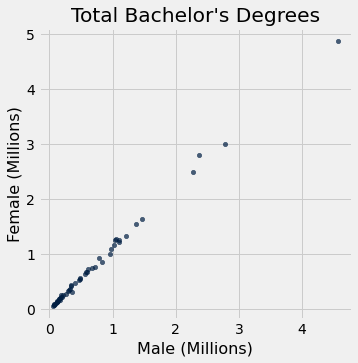

In [87]:
Bachelors_by_Sex.scatter('Male (Millions)')
plots.title('Total Bachelor\'s Degrees');

#### 3.3 (4 Points)
In the scatterplot, you will notice that there is one state that has an unusually large amount of people with bachelor's degrees. Use the table methods you learned in class on the table **edu_clean_int** to identify this state and print out a table below that only shows this one state and the total number of bachelor's degrees for male and female based on people 25 and older (Female and Male). This table should contain one state and two rows. I don't care if you include all of the variables from the table **edu_clean_int**.

In [92]:
edu_clean_int.sort('Total', descending = True).take(0, 1)

State,Sex,Age Group,Total,ScEn,ScEn Rel,Business,Education,Other
California,Female,25 and older,4868520,1653732,538515,806195,440910,1429168
California,Male,25 and older,4559964,2275829,242881,914899,139456,986899


## Question 4 (14 Points)

#### 4.1 (6 Points)
In order to make comparisons across states, it may be helpful to convert our counts to proportions. We want to compare states based on the percentage of bachelor's degrees that are "ScEn" and "ScEn Rel" for people in the "25 to 39" age group. Create a table named **young_prop** based on **edu_clean_int** by subsetting the data based off the mentioned age group, removing the variables named "Age Group", "Business", "Education", and "Other", creating a new variable called "STEM" which calculates the percentage of total bachelor's degrees that are either "ScEn" or "ScEn Rel" for Males and Femals and finally, removing the variables "Total", "ScEn" and "ScEn Rel". Your final table named **young_prop** should contain three variables: "State", "Sex", and "STEM".

In [117]:
from_25_to_39 = edu_clean_int.where('Age Group', '25 to 39')
percentages = (from_25_to_39.column('ScEn') + from_25_to_39.column('ScEn Rel')) / from_25_to_39.column('Total')

young_prop = from_25_to_39.select('State', 'Sex').with_column('STEM', percentages)
young_prop #Do Not Change this Line

State,Sex,STEM
Alabama,Male,0.491536
Alabama,Female,0.431509
Alaska,Male,0.475016
Alaska,Female,0.496761
Arizona,Male,0.52622
Arizona,Female,0.465594
Arkansas,Male,0.501112
Arkansas,Female,0.435061
California,Male,0.554143
California,Female,0.492849


#### 4.2 (4 Points)
I want you to create a histogram of the variable "STEM" for females and males separately. In these plots, I want you to specify the unit of "STEM" as "Proportion" and I want you to add the line of code "*plots.xlim([0.3,0.7]);*". The word "Proportion" reminds people that the values on the x-axis represent the proportion of bachelor's degrees that are STEM degrees. The additional line of code ensures that we can easily compare the histogram for females to the one for males.

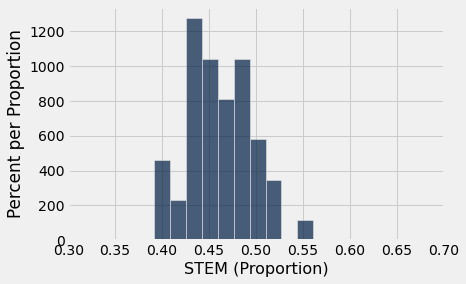

In [113]:
# Put the histogram for females here
young_prop.where('Sex', 'Female').hist('STEM', unit = 'Proportion')
plots.xlim([0.3,0.7]);

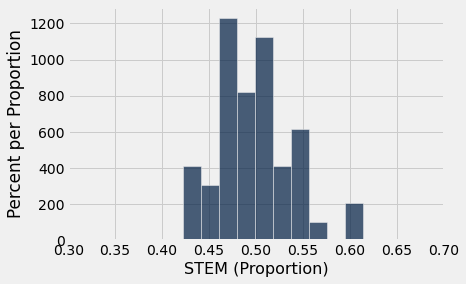

In [114]:
# Put the histogram for males here
young_prop.where('Sex', 'Male').hist('STEM', unit = 'Proportion')
plots.xlim([0.3,0.7]);

#### 4.3 (4 Points)

From the two histograms above, what do you learn about the difference between males and females in the "25 to 39" age group? Cite your reason(s) for your conclusion using properties of the histograms above.

*In the 25 to 39 age group, a larger proportion of males have STEM degrees when compared to females. This can be seen in the histograms above, where the maximum and minimum proportions for males are around 0.60 and 0.43, while the maximum and minimum proportions for females are around 0.55 and 0.40.*

## Question 5

#### 5.1 (4 Points)
Starting with **edu_clean_int**, I want you to use the **group** method to count the total number of business degrees for females and males across all age groups and states. I only care about business degrees in this problem. Then, I want you to create a horizontal bar plot summarizing the information about business degrees. You can do this in multiple steps. I just want to see the bar plot. If you don't use the **group** method, you will not get full credit.

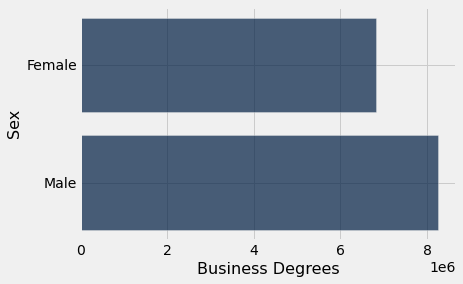

In [146]:
edu_clean_int.where('Age Group', '25 and older').group('Sex', sum).relabeled('Business sum', 'Business Degrees').barh('Sex', 'Business Degrees')

#### 5.2 (4 Points)

This question is similar to the previous question except we want to consider age group here. Use the **pivot** method to count the total number of business degrees for every combination between "Sex" and "Age Group". I want the categories of "Sex" to be on the two rows and the categories of "Age Group" to be on the columns. Since the "25 and older" category contains all ages, remove it from consideration. Save this pivot table to an object named **Sex_Age_Business**.

In [162]:
Sex_Age_Business = edu_clean_int.where('Age Group', are.not_equal_to('25 and older')).group(['Sex', 'Age Group'], sum).pivot('Age Group', 'Sex', 'Business sum', int)

Sex_Age_Business #Do Not Change this Line"

Sex,25 to 39,40 to 64,65 and older
Female,2296595,3814992,706630
Male,2516308,3979550,1766633


#### 5.3 (4 Points)

Then, create a horizontal bar plot of the total number of business degrees for every combination between "Sex" and "Age Group" (excluding "25 and older"). Use your table created in the previous question. The barplot should have the two "Sex" categories on the vertical axis, and the three "Age Group" categories should be in the legend. Give this plot a title called "Number of Business Degrees".

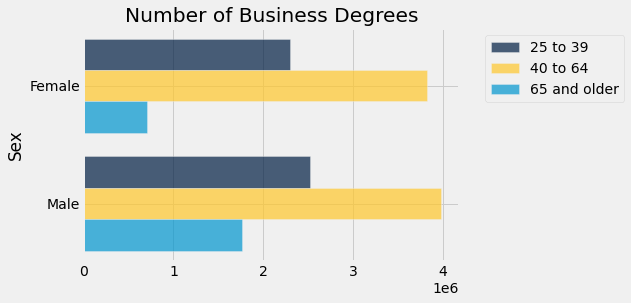

In [168]:
Sex_Age_Business.barh('Sex')
plots.title('Number of Business Degrees');